**Assignment #2**


---


**Machine Learning and Data Science ‐ ENCS5341**


---


**Section 2**


---


**Raghad Afaghani 1192423**


---



***Model Selection and Hyper-parameters Tunning***

**1- Read the data from the csv file and split it into training set (the first 120
examples), validation set (the next 40 examples), and testing set (the last 40
examples). Plot the examples from the three sets in a scatter plot (each set
encoded with a different color). Note that the plot here will be 3D plot where
the x and y axes represent the x1 and x2 features, whereas the z-axis is the
target label y.**


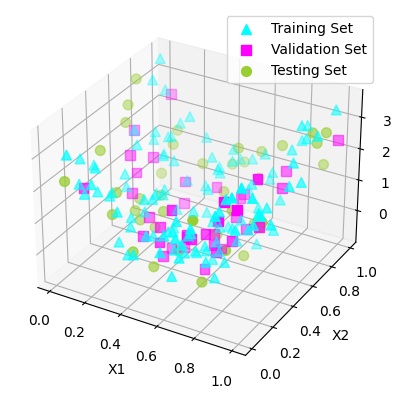

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('data_reg.csv')

# Split the data into training, validation, and testing sets as the question needed
train_data = data[:120]
valid_data = data[120:160]
test_data = data[160:]

# Creating 3D scatter plot using Axes3D
fig = plt.figure()
sq = fig.add_subplot(111, projection='3d')

# Styles
marker_style_train = '^'  # triangle
marker_style_valid = 's'  # square
marker_style_test = 'o'   # circle

#Colors
color_train = 'cyan'
color_valid = 'magenta'
color_test = 'yellowgreen'

# SP for training
sq.scatter(train_data['x1'], train_data['x2'], train_data['y'],
           color=color_train, marker=marker_style_train, label='Training Set', s=50)

# SP for validation
sq.scatter(valid_data['x1'], valid_data['x2'], valid_data['y'],
           color=color_valid, marker=marker_style_valid, label='Validation Set', s=50)

# SP for testing
sq.scatter(test_data['x1'], test_data['x2'], test_data['y'],
           color=color_test, marker=marker_style_test, label='Testing Set', s=50)

# Labels
sq.set_xlabel('X1')
sq.set_ylabel('X2')
sq.set_zlabel('Y')
sq.legend()

# Show the plot
plt.show()


**2- Apply polynomial regression on the training set with degrees in the range of 1
to 10. Which polynomial degree is the best? Justify your answer by plotting the
validation error vs polynomial degree curve. For each model plot the surface of
the learned function alongside with the training examples on the same plot.
(hint: you can use PolynomialFeatures and LinearRegression from
scikit-learn library)**


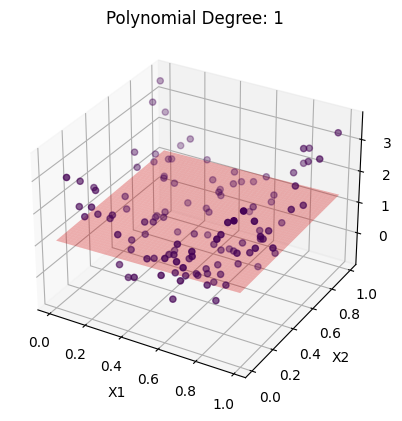

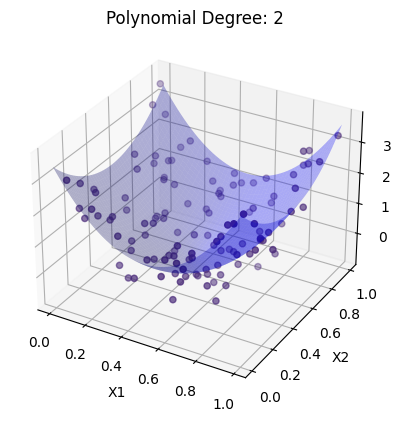

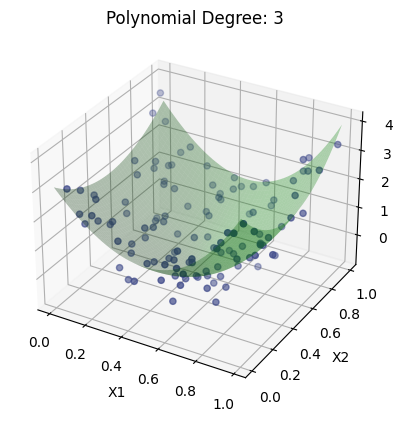

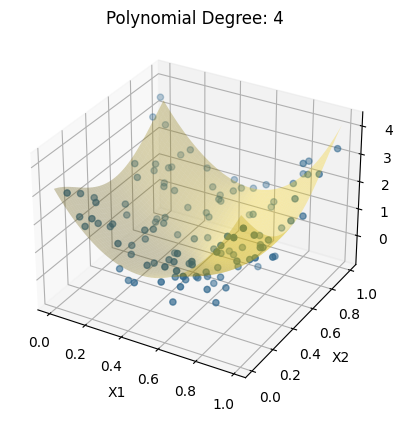

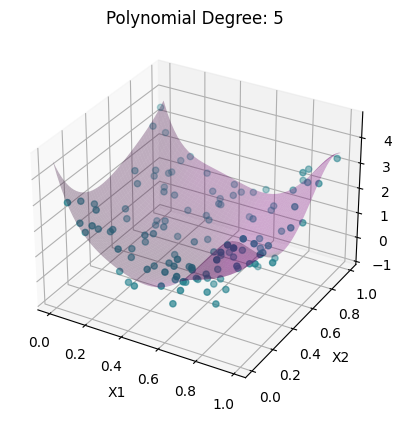

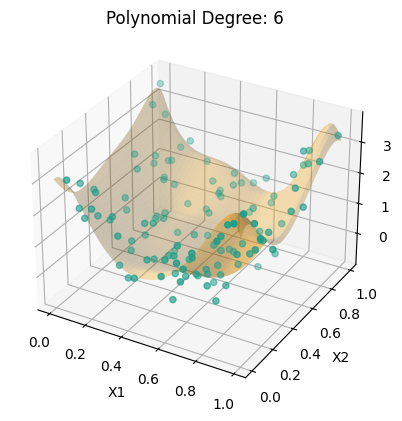

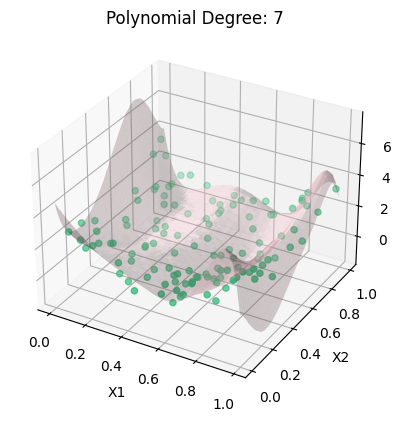

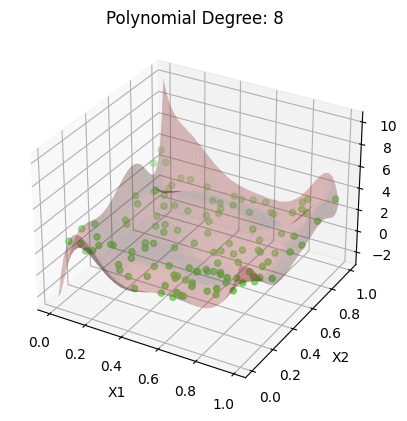

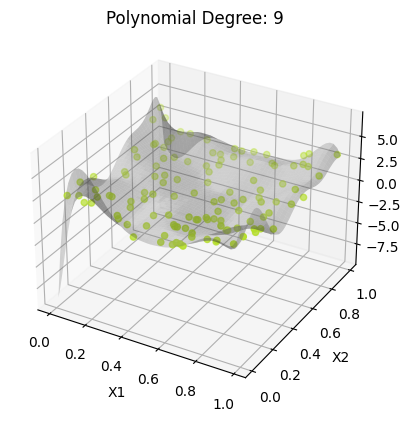

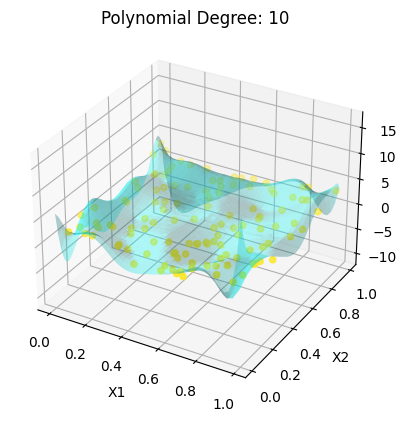

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train = train_data[['x1', 'x2']]
y_train = train_data['y']
X_valid = valid_data[['x1', 'x2']]
y_valid = valid_data['y']

#Validation Errors
valid_errors = []

# Polynomial degrees from 1 to 10
degrees = range(1, 11)

# Colors
scatter_colors = plt.cm.viridis(np.linspace(0, 1, len(degrees)))
surface_colors = ['red', 'blue', 'green', 'gold', 'purple',
                  'orange', 'pink', 'brown', 'grey', 'cyan']

# Going through all polynomial degrees
for degree, (scatter_color, surface_color) in zip(degrees, zip(scatter_colors, surface_colors)):
    # Making polynomial features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_valid_poly = poly.transform(X_valid)

    # Training Process
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Prediction on Validation
    y_valid_pred = model.predict(X_valid_poly)

    # Validation Error
    error = mean_squared_error(y_valid, y_valid_pred)
    valid_errors.append(error)

    #Drawing the shape of the learned pattern
    fig = plt.figure()
    sq = fig.add_subplot(111, projection='3d')
    sq.scatter(X_train['x1'], X_train['x2'], y_train, color=scatter_color, label='Training Data')
    grid_x1, grid_x2 = np.meshgrid(np.linspace(X_train['x1'].min(), X_train['x1'].max(), 50),
                                   np.linspace(X_train['x2'].min(), X_train['x2'].max(), 50))
    grid_df = pd.DataFrame(np.hstack((grid_x1.reshape(-1, 1), grid_x2.reshape(-1, 1))), columns=['x1', 'x2'])
    grid_poly = poly.transform(grid_df)
    grid_y = model.predict(grid_poly).reshape(grid_x1.shape)


    sq.plot_surface(grid_x1, grid_x2, grid_y, alpha=0.3, color=surface_color)
    sq.set_title(f'Polynomial Degree: {degree}')
    sq.set_xlabel('X1')
    sq.set_ylabel('X2')
    sq.set_zlabel('Y')
    plt.show()


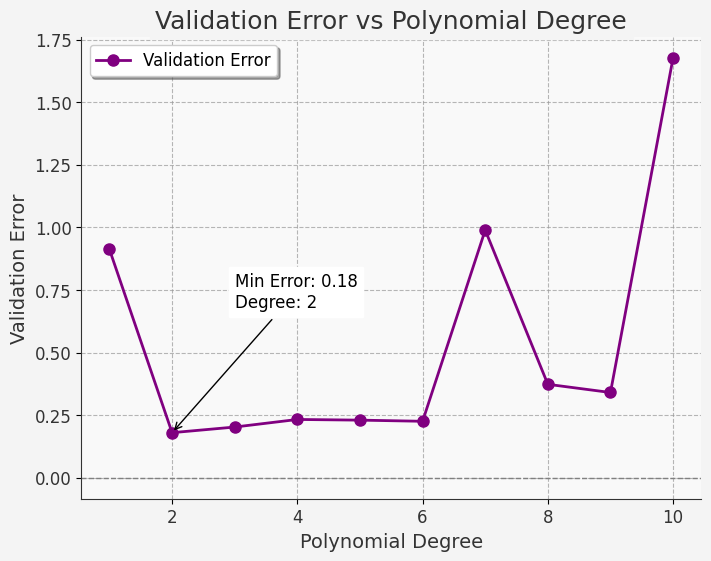

In [61]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('#f4f4f4')#background color
plt.plot(degrees, valid_errors, marker='o', color='purple', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Polynomial Degree', fontsize=14, color='#333333')
plt.ylabel('Validation Error', fontsize=14, color='#333333')
plt.title('Validation Error vs Polynomial Degree', fontsize=18, color='#333333', backgroundcolor='#f4f4f4')
plt.grid(True, linestyle='--', alpha=0.7, color='#999999')#grid lines
plt.legend(['Validation Error'], loc='best', fontsize=12, shadow=True)
plt.xticks(fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)#line on horizontal 0

#which index on validation value
min_error_idx = valid_errors.index(min(valid_errors))
#on which degree
plt.annotate(f'Min Error: {min(valid_errors):.2f}\nDegree: {degrees[min_error_idx]}',
             xy=(degrees[min_error_idx], valid_errors[min_error_idx]),
             xytext=(degrees[min_error_idx] + 1, valid_errors[min_error_idx] + 0.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='black', backgroundcolor='white')

#Borders
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_color('#333333')
ax.spines['left'].set_color('#333333')
ax.set_facecolor('#f9f9f9')
plt.show()


The best polynomial degree is determined by identifying the degree value at which the validation error reaches its lowest point. In this particular case, the lowest point on the validation error curve occurs at degree 2. This suggests that a polynomial of degree 2 provides the best fit or performance for our  dataset. In polynomial regression or curve fitting, selecting the right degree is crucial as it balances the trade-off between underfitting (using a lower degree polynomial that simplifies the model too much) and overfitting (using a higher degree polynomial that fits the training data too closely but performs poorly on unseen data).







**3- Apply ridge regression on the training set to fit a polynomial of degree 8. For
the regularization parameter, choose the best value among the following
options: {0.001, 0.005, 0.01, 0.1, 10}. Plot the MSE on the validation vs the
regularization parameter.
(hint: you can use Ridge regression implementation from scikit-learn)**


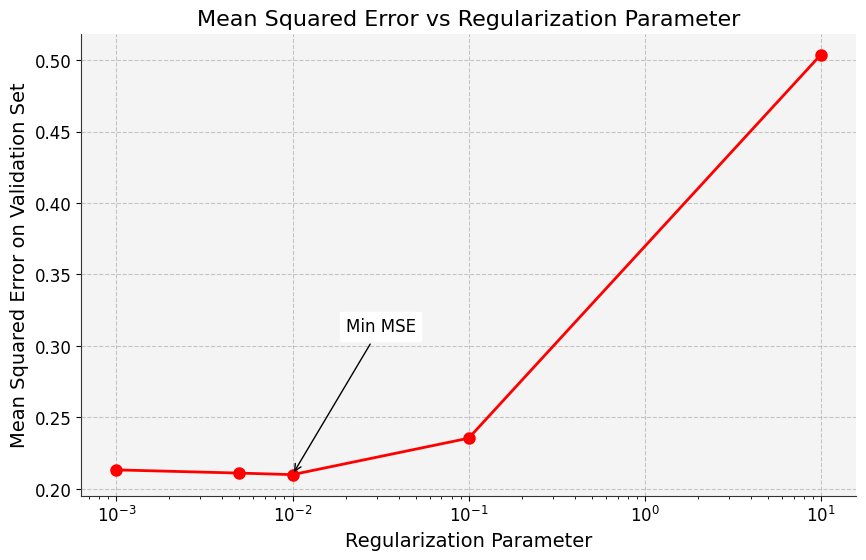

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Polynomial degree
degree = 8

# Making polynomial features
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_valid_poly = poly.transform(X_valid)

# For the regularization parameter
reg_params = [0.001, 0.005, 0.01, 0.1, 10]
mse_on_valid = []

# Go over all regularization parameters
for alpha in reg_params:
    model = Ridge(alpha=alpha)
    model.fit(X_train_poly, y_train)

    # Prediction on validation
    y_valid_pred = model.predict(X_valid_poly)

    # MSE
    mse = mean_squared_error(y_valid, y_valid_pred)
    mse_on_valid.append(mse)

#Figure
plt.figure(figsize=(10, 6))
plt.plot(reg_params, mse_on_valid, marker='o', color='red', linestyle='-', linewidth=2, markersize=8)
plt.xscale('log')
plt.xlabel('Regularization Parameter', fontsize=14)
plt.ylabel('Mean Squared Error on Validation Set', fontsize=14)
plt.title('Mean Squared Error vs Regularization Parameter', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Highliting the min MSE point
min_mse_idx = mse_on_valid.index(min(mse_on_valid))
plt.annotate('Min MSE',
             xy=(reg_params[min_mse_idx], mse_on_valid[min_mse_idx]),
             xytext=(reg_params[min_mse_idx] * 2, mse_on_valid[min_mse_idx] + 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='black', backgroundcolor='white')

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_color('#333333')
ax.spines['left'].set_color('#333333')
ax.set_facecolor('#f4f4f4')
plt.show()


In the graph, increasing the regularization parameter slightly at first doesn't change the model's errors much, indicating stability. But overly high regularization causes errors to rise sharply,  The optimal point is around a regularization value of  0.01. where the model neither too loose nor too strict, making the best predictions on new data.









---



***Logistic Regression***

**1. using the logistic regression implementation of scikit-learn library, Learn
a logistic regression model with a linear decision boundary. Draw the decision
boundary of the learned model on a scatterplot of the training set (similar to
Figure 1). Compute the training and testing accuracy of the learned model.**

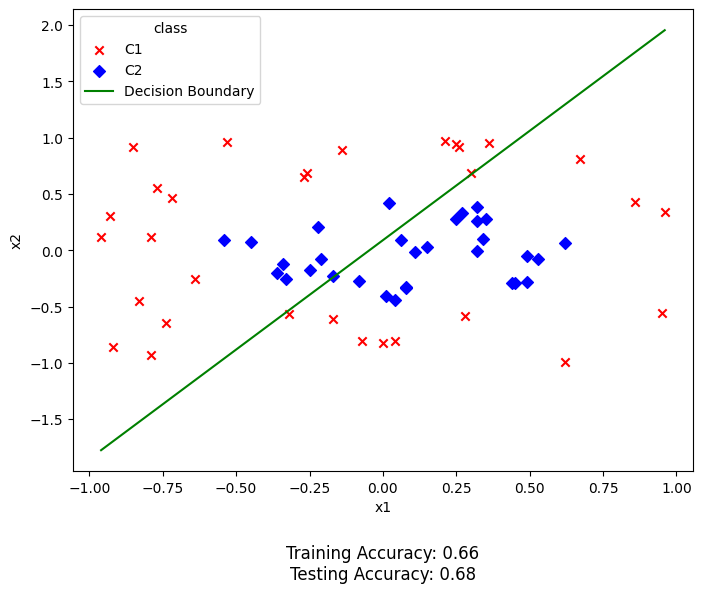

In [69]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

train_data = pd.read_csv('/content/train_cls.csv')
test_data = pd.read_csv('/content/test_cls.csv')

# Features vs target
trainX = train_data[['x1', 'x2']]
trainY = train_data['class']
testX = test_data[['x1', 'x2']]
testY = test_data['class']

# Training a logistic regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(trainX, trainY)

# Accuracy
training_accuracy = accuracy_score(trainY, logistic_reg.predict(trainX))
testing_accuracy = accuracy_score(testY, logistic_reg.predict(testX))
plt.figure(figsize=(8, 6))

#Points
plt.scatter(train_data[train_data['class'] == 'C1']['x1'], train_data[train_data['class'] == 'C1']['x2'], color='red', marker='x', label='C1')
plt.scatter(train_data[train_data['class'] == 'C2']['x1'], train_data[train_data['class'] == 'C2']['x2'], color='blue', marker='D', label='C2')

# Decision Boundary(Linerar)
coefficient = logistic_reg.coef_[0]
intercept = logistic_reg.intercept_
x_values = np.linspace(trainX['x1'].min(), trainX['x1'].max(), 100) #for a smoother line
y_values = -(x_values * coefficient[0] + intercept) / coefficient[1]
plt.plot(x_values, y_values, label='Decision Boundary', color='green')

#Figure
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(title='class')
accuracy_text = f"Training Accuracy: {training_accuracy:.2f}\nTesting Accuracy: {testing_accuracy:.2f}"
plt.text(0.5, -0.2, accuracy_text, fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()


The Linear Decision Boundary does not capturing the complex structure of the data , such as the blue and red points that appears in the same side of boundary, The training and testing accuracy prove that.so the model may be get underfitting because the model here is too simple to understand the patterns in the data.






**2. Repeat part 1 but now to learn a logistic regression model with quadratic
decision boundary.**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
<ipython-input-74-d6de57f99154>:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  custom_cmap = plt.cm.get_cmap('cool', 2)


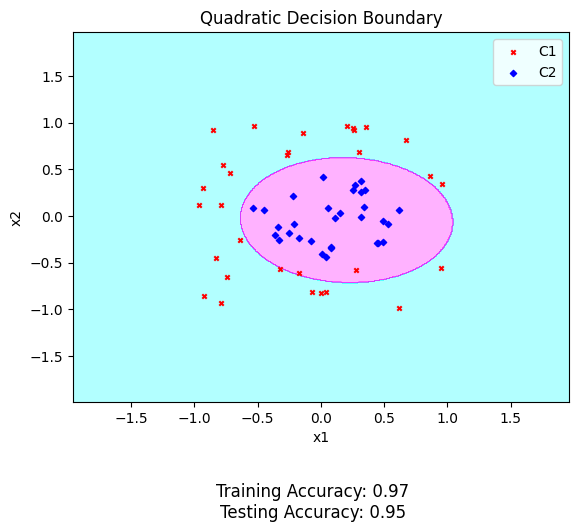

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


# Encoding
encoder = LabelEncoder()

# Encode the target to numeric values
train_data['class_encoded'] = encoder.fit_transform(train_data['class'])
test_data['class_encoded'] = encoder.transform(test_data['class'])


trainX = train_data[['x1', 'x2']]
trainY = train_data['class_encoded']
testX = test_data[['x1', 'x2']]
testY = test_data['class_encoded']

# A Pipeline in sklearn is used to assemble several steps
quadratic_model = Pipeline([
    #degree
    ('poly', PolynomialFeatures(degree=2)),
    #for classification
    ('logistic', LogisticRegression())
])

# Fitting the model
quadratic_model.fit(trainX, trainY)
x_min, x_max = trainX['x1'].min() - 1, trainX['x1'].max() + 1
y_min, y_max = trainX['x2'].min() - 1, trainX['x2'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

testY_pred = quadratic_model.predict(testX)
testing_accuracy = accuracy_score(testY, testY_pred)

# Accuracy
trainY_pred = quadratic_model.predict(trainX)
training_accuracy = accuracy_score(trainY, trainY_pred)
testY_pred = quadratic_model.predict(testX)
testing_accuracy = accuracy_score(testY, testY_pred)

# Prediction
Z = quadratic_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Color
custom_cmap = plt.cm.get_cmap('cool', 2)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=custom_cmap)

# SP for C1
plt.scatter(train_data[train_data['class'] == 'C1']['x1'], train_data[train_data['class'] == 'C1']['x2'], color='red', marker='x', label='C1',s=10)

# SP for Class C2
plt.scatter(train_data[train_data['class'] == 'C2']['x1'], train_data[train_data['class'] == 'C2']['x2'], color='blue', marker='D', label='C2', s=10)

# Limits plot
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.xlabel('x1')
plt.ylabel('x2')

plt.legend()

# Display
accuracy_text = f"Training Accuracy: {training_accuracy:.2f}\nTesting Accuracy: {testing_accuracy:.2f}"
plt.figtext(0.5, -0.1, accuracy_text, fontsize=12, ha='center', va='center')
plt.title('Quadratic Decision Boundary')
plt.show()


In Quadratic Decision Boundary,the model seems more better because is sepearate the two classes in good way and that appears from the accuracy. the model here may get in overfitting, because it seem like the model learns the details and noises in the training data so that it negatively impacts the model's performance on unseen data.

**3. Comment on the learned models in 1 and 2 in terms of overfitting/underfitting.**

As shown under each figure.